In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = np.load("ORL_faces.npz")

In [3]:
x_train = data['trainX']
x_test = data['testX']
y_train = data['trainY']
y_test = data['testY']

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 10304)
(160, 10304)
(240,)
(160,)


In [5]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
print(x_train.shape)
print(x_test.shape)

(240, 10304)
(160, 10304)


In [7]:
x_train

array([[0.1882353 , 0.19215687, 0.1764706 , ..., 0.18431373, 0.18039216,
        0.18039216],
       [0.23529412, 0.23529412, 0.24313726, ..., 0.1254902 , 0.13333334,
        0.13333334],
       [0.15294118, 0.17254902, 0.20784314, ..., 0.11372549, 0.10196079,
        0.11372549],
       ...,
       [0.44705883, 0.45882353, 0.44705883, ..., 0.38431373, 0.3764706 ,
        0.38431373],
       [0.4117647 , 0.4117647 , 0.41960785, ..., 0.21176471, 0.18431373,
        0.16078432],
       [0.45490196, 0.44705883, 0.45882353, ..., 0.37254903, 0.39215687,
        0.39607844]], dtype=float32)

In [8]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train_valid, x_test_valid, y_train_valid, y_test_valid = train_test_split(
    x_train, y_train, train_size=0.7, random_state=1234 )

In [13]:
print(x_train.shape)
print(x_test.shape)
print(x_train_valid.shape)
print(x_test_valid.shape)
print(y_train_valid.shape)
print(y_test_valid.shape)

(240, 10304)
(160, 10304)
(168, 10304)
(72, 10304)
(168,)
(72,)


In [14]:
im_rows = 112
im_cols = 92

im_size = (im_rows, im_cols, 1)

In [15]:
x_train_valid = x_train_valid.reshape(x_train_valid.shape[0], *im_size)
x_test_valid = x_test_valid.reshape(x_test_valid.shape[0], *im_size)

In [25]:
print(x_train_valid.shape)
print(x_test_valid.shape)

(168, 112, 92, 1)
(72, 112, 92, 1)


In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [18]:
cnn_model = Sequential([
    Conv2D(filters = 32, kernel_size = 5, activation = 'relu', input_shape = im_size ),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 64, kernel_size = 5, activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Flatten(),
    Dense(units = 2048, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 1024, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 512, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'softmax')
])

In [19]:
cnn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss= tf.keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy'])

In [21]:
result = cnn_model.fit(x_train_valid,y_train_valid, epochs=100, batch_size=512, validation_data=(x_test_valid, y_test_valid))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.0001 - accuracy: 0.0595 - val_loss: 3.2967 - val_accuracy: 0.0556
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 3.8738 - accuracy: 0.0476 - val_loss: 3.0370 - val_accuracy: 0.0556
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 3.1718 - accuracy: 0.0536 - val_loss: 2.9912 - val_accuracy: 0.0139
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 3.0179 - accuracy: 0.0774 - val_loss: 2.9908 - val_accuracy: 0.0556
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 2.9882 - accuracy: 0.0476 - val_loss: 2.9917 - val_accuracy: 0.0556
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 2.9796 - accuracy: 0.1012 - val_loss: 2.9901 - val_accuracy: 0.0556
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 2.9765 - accuracy: 0.0714 - val_loss: 2.9968 - val_accuracy: 0.0694
Epoch 8/100
1/1 [=================

1/1 [==============================] - 2s 2s/step - loss: 0.0151 - accuracy: 0.9940 - val_loss: 0.0860 - val_accuracy: 0.9722
Epoch 61/100
1/1 [==============================] - 2s 2s/step - loss: 0.0216 - accuracy: 0.9881 - val_loss: 0.0800 - val_accuracy: 0.9722
Epoch 62/100
1/1 [==============================] - 2s 2s/step - loss: 0.0295 - accuracy: 0.9821 - val_loss: 0.0765 - val_accuracy: 0.9722
Epoch 63/100
1/1 [==============================] - 2s 2s/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9722
Epoch 64/100
1/1 [==============================] - 2s 2s/step - loss: 0.0124 - accuracy: 0.9940 - val_loss: 0.0577 - val_accuracy: 0.9722
Epoch 65/100
1/1 [==============================] - 2s 2s/step - loss: 0.0145 - accuracy: 0.9940 - val_loss: 0.0503 - val_accuracy: 0.9722
Epoch 66/100
1/1 [==============================] - 2s 2s/step - loss: 0.0423 - accuracy: 0.9821 - val_loss: 0.0457 - val_accuracy: 0.9722
Epoch 67/100
1/1 [======================

In [26]:
score = cnn_model.evaluate(x_test_valid, y_test_valid, verbose=0)

In [27]:
score

[0.03758759796619415, 0.9861111044883728]

In [28]:
print(" test loss = {:.4f}".format(score[0]))
print(" test accuracy =  {:.4f}".format(score[1]))

 test loss = 0.0376
 test accuracy =  0.9861


In [29]:
import matplotlib.pyplot as plt

In [30]:
print(result.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


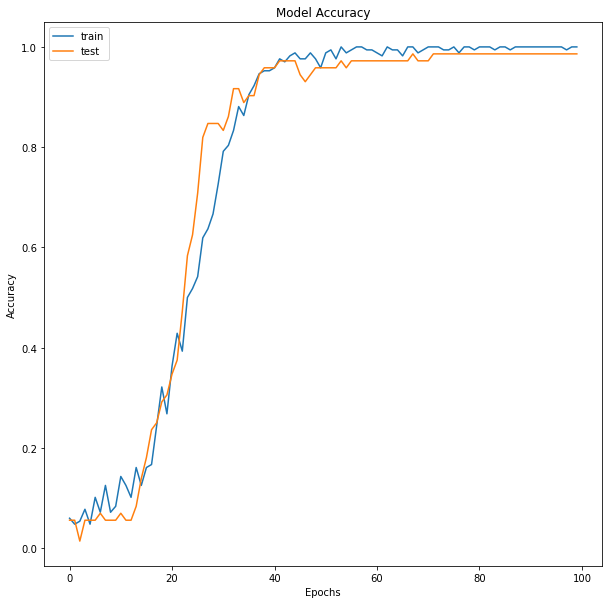

In [31]:
plt.figure(figsize=(10,10))

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'], loc = 'best')
plt.show()

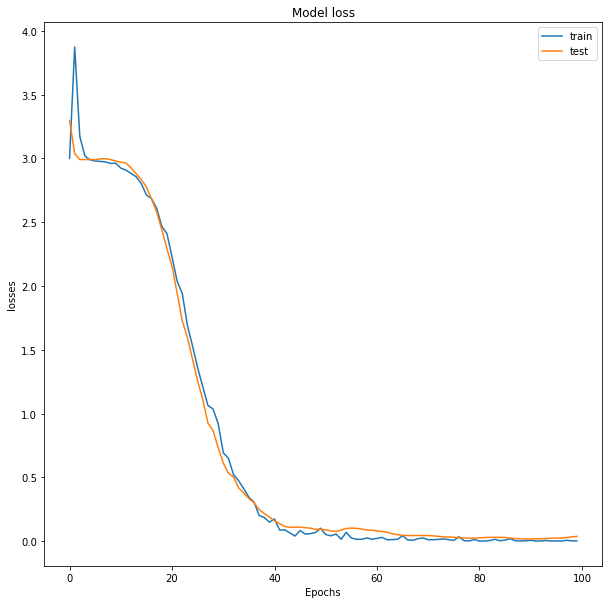

In [32]:
plt.figure(figsize=(10,10))

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("losses")
plt.legend(['train','test'], loc = 'best')
plt.show()